In [2]:
#importing and downloading the data
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data", one_hot = True) #one hot encoding for Y lables
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
file_path='D:\\My Personal Documents\\Learnings\\Data Science\\Data Sets\\Edureka Lab\wine.csv'
data = pd.read_csv(file_path)
from sklearn.model_selection import train_test_split

C:\Amrendra\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
y = data.Wine
x = data.drop('Wine', axis=1)

In [4]:
y=pd.get_dummies(y)

In [5]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=3)

In [6]:
y_train.shape

(142, 3)

In [7]:
#network parameters
learning_rate = 0.01
training_epochs = 300 #number of interations
batch_size = 100 #55000 images..
display_step = 1
cost_history =[]

In [8]:
#network related


n_input = 13
n_hidden_1 = 200
#n_hidden_2 = 200
n_classes =3

  

In [9]:

x = tf.placeholder("float", [None, n_input])  #[100,784] 
y = tf.placeholder("float", [None, n_classes]) #[100,10]

In [10]:
def singlelayer_perceptron(x,weights, biases):
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1']) #netl1 #x.h1+b1 [100,784].[784,256] = [100,256]
    layer_1 = tf.nn.relu(layer_1) #activation #out l1
   # layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #layer_1*h2+b2 [100,256].[256,256] = [100,256]
   # layer_2 = tf.nn.relu(layer_2) #activation
    out_layer = tf.matmul(layer_1, weights['out'])+biases['out'] #layer_2*out_w+b_out [100,256].[256,10] = [100,10]
    return out_layer

In [11]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),   #[784, 256]
   # 'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])), #[256, 256]
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes])) #[256, 10]
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),  #[256]
   # 'b2': tf.Variable(tf.random_normal([n_hidden_2])),   #[256]
    'out': tf.Variable(tf.random_normal([n_classes]))  #[10]
}

In [12]:
#l1 = tf.layers.dense(x,3,activation = 'relu')
#l1 = tf.layers.dense(l1, 3,activation = 'relu')

In [13]:
pred = singlelayer_perceptron(x,weights,biases) #[100,10]
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels =y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



Epoch: 0001 cost= 4695.105957031
Epoch: 0002 cost= 3191.132080078
Epoch: 0003 cost= 1687.741455078
Epoch: 0004 cost= 1558.095825195
Epoch: 0005 cost= 1275.210327148
Epoch: 0006 cost= 1101.393432617
Epoch: 0007 cost= 1522.340942383
Epoch: 0008 cost= 1783.914550781
Epoch: 0009 cost= 1822.193603516
Epoch: 0010 cost= 1692.912353516
Epoch: 0011 cost= 1432.994384766
Epoch: 0012 cost= 1106.885986328
Epoch: 0013 cost= 1057.311401367
Epoch: 0014 cost= 1122.539550781
Epoch: 0015 cost= 1007.975036621
Epoch: 0016 cost= 712.105773926
Epoch: 0017 cost= 368.953643799
Epoch: 0018 cost= 267.888061523
Epoch: 0019 cost= 564.331848145
Epoch: 0020 cost= 620.869506836
Epoch: 0021 cost= 483.036651611
Epoch: 0022 cost= 555.075256348
Epoch: 0023 cost= 506.478607178
Epoch: 0024 cost= 374.988311768
Epoch: 0025 cost= 339.366790771
Epoch: 0026 cost= 169.233047485
Epoch: 0027 cost= 33.357231140
Epoch: 0028 cost= 301.660339355
Epoch: 0029 cost= 370.856323242
Epoch: 0030 cost= 224.292282104
Epoch: 0031 cost= 222.9521

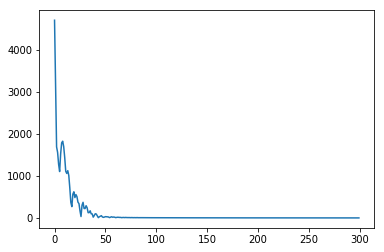

In [14]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs): #15
        avg_cost =0.
        #total_batch = int(data.num_examples/batch_size)  #55000/100 = 550 #550*100 = 55000
        #for i in range(total_batch): #550
          #  batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict = {x:x_train,y:y_train})
        avg_cost += c
        if epoch % display_step ==0:
            cost_history.append(avg_cost)
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("optimization finished")
      #-------------------------------
    correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x:x_train, y:y_train}))
    plt.plot(cost_history)
    plt.show()